# Problem settings

State space:
$$
z_t=z_{t-1}+\eta_t, \quad \eta_t \sim \mathcal{N}\left(\eta_t ; 0, \Gamma\right)
$$

Observation space:
$$
x_t=z_t+\epsilon_t, \quad \epsilon_t \sim \mathcal{N}\left(\epsilon_t ; 0, \Sigma\right)
$$

Emission p.d.f.s:
Transition p.d.f.s:
$$
\begin{array}{ll}
\text { Emission p.d.f.s: } & p\left(x_t \mid z_t\right)=\mathcal{N}\left(x_t ; z_t, \Sigma\right) \\
\text { Transition p.d.f.s: } & p\left(z_t \mid z_{t-1}\right)=\mathcal{N}\left(z_t ; z_{t-1}, \Gamma\right) \\
\text { Initial transition p.d.f.s: } & p\left(z_0\right)=\mathcal{N}\left(z_0 ; \mu_0, P_0\right)
\end{array}
$$
where $\Sigma=0.7, \Gamma=0.4, \mu_0=0, P_0=1$


\begin{array}{|c|}
\hline \text { Sample data } \\
\hline \boldsymbol{x}_{\mathbf{0}}=-\frac{1}{10} n_0 \\
\hline \boldsymbol{x}_{\mathbf{1}}=-\frac{2}{9} n_1 \\
\hline \boldsymbol{x}_{\mathbf{2}}=\frac{1}{5} n_2 \\
\hline \boldsymbol{x}_{\mathbf{3}}=\frac{2}{9} n_3 \\
\hline
\end{array}

# Formulas
__(1)__

$\begin{aligned}
P(z_t \mid x_{0:t-1})
&= \mathcal{N}(z_t; \mu_{t-1}, P_{t-1} + \Gamma)
\end{aligned}$

---
__(2)__

$
p(x_t \mid x_{0:t-1}) = \mathcal{N}(x_t; \mu_{t\mid t-1}, P_{t\mid t-1} + \Sigma),
$

where $\mu_{t\mid t-1} = \mu_{t-1}$ and $P_{t\mid t-1} = P_{t-1} + \Gamma$

---
__(3)__

$p(x_{0:t}) = p(x_0)p(x_1\mid x_{0})\prod^t_{i=2}p(x_i\mid x_{0:i-1})$

---
__(4)__

$p(z_t \mid x_{0:t}) = \mathcal{N}(\mu_t, P_t)$,

where

$\mu_t = \mu_{t \mid t-1} + K_t(x_t - \mu_{t \mid t-1})$,

$P_t = (I - K_t)P_{t\mid t-1}$, where $K_t = P_{t\mid t-1}(P_{t\mid t-1} + \Sigma)^{-1}$


---
---
# Calculate:

\begin{aligned}
& P\left(z_2 \mid x_0, x_1\right)= \\
& \ln P\left(x_2 \mid x_0, x_1\right)= \\
& \ln P\left(x_0, x_1, x_2\right)= \\
& P\left(z_2 \mid x_0, x_1, x_2\right)=
\end{aligned}


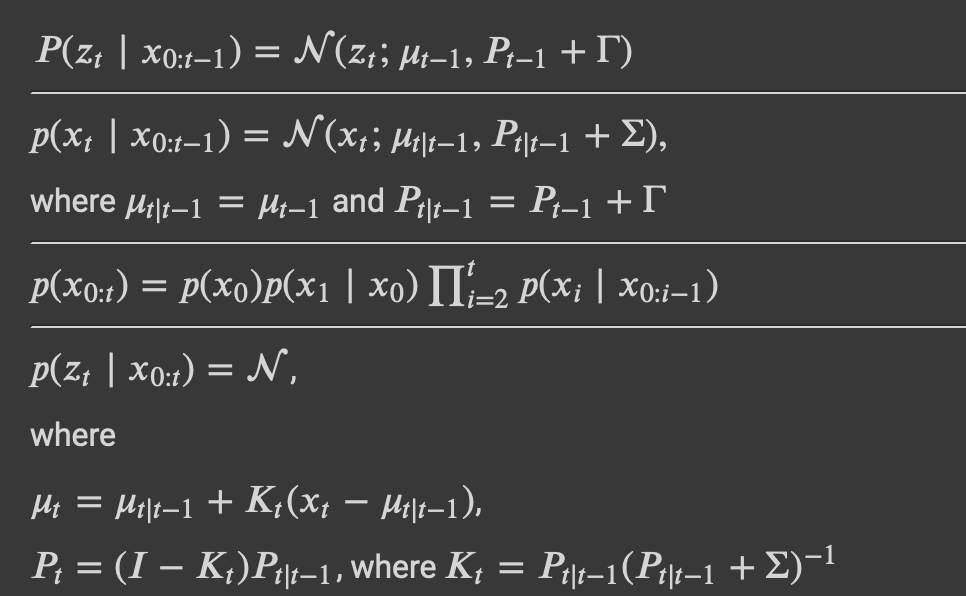

# 問1

In [ ]:
np.log(norm.pdf(x[0], 0, np.sqrt(1.7)))

-1.187193835206346

In [ ]:
0, 1

(0, 1)

# 問2, 3, 4 がこれで計算できます


In [ ]:
import numpy as np
from scipy.stats import norm

# Problem settings
Σ = 0.7
Γ = 0.4
μ_0 = 0
P_0 = 1

# Sample data
n0, n1, n2, n3 = 1, 2, 7, 2
x = [-1/10 * n0, -2/9 * n1, 1/5 * n2, 2/9 * n3]

# Initialize variables
μ_t = μ_0
P_t = P_0

# Helper functions
def predict(μ, P, Γ):
    μ_pred = μ
    P_pred = P + Γ
    return μ_pred, P_pred

def update(μ_pred, P_pred, x_t, Σ):
    K_t = P_pred / (P_pred + Σ)
    μ_update = μ_pred + K_t * (x_t - μ_pred)
    P_update = (1 - K_t) * P_pred
    return μ_update, P_update, K_t

# Calculations for t = 1
μ_1_pred, P_1_pred = predict(μ_t, P_t, Γ)
μ_1, P_1, K_1 = update(μ_1_pred, P_1_pred, x[1], Σ)

# Calculations for t = 2
μ_2_pred, P_2_pred = predict(μ_1, P_1, Γ)
μ_2, P_2, K_2 = update(μ_2_pred, P_2_pred, x[2], Σ)

# Calculations for t = 3
μ_3_pred, P_3_pred = predict(μ_2, P_2, Γ)
μ_3, P_3, K_3 = update(μ_3_pred, P_3_pred, x[3], Σ)

# Log-likelihood calculations
ln_P_x1_given_x0 = np.log(norm(μ_1_pred, np.sqrt(P_1_pred + Σ)).pdf(x[1]))
ln_P_x0_x1 = np.log(norm(μ_0, np.sqrt(P_0 + Σ)).pdf(x[0])) + ln_P_x1_given_x0

ln_P_x2_given_x0_x1 = np.log(norm(μ_2_pred, np.sqrt(P_2_pred + Σ)).pdf(x[2]))
ln_P_x0_x1_x2 = ln_P_x0_x1 + ln_P_x2_given_x0_x1

ln_P_x3_given_x0_x1_x2 = np.log(norm(μ_3_pred, np.sqrt(P_3_pred + Σ)).pdf(x[3]))
ln_P_x0_x1_x2_x3 = ln_P_x0_x1_x2 + ln_P_x3_given_x0_x1_x2

# Output results for each t
print("t = 1")
print("Predicted: μ_1_pred =", μ_1_pred, ", P_1_pred =", P_1_pred)
print("ln P(x_1 | x_0) =", ln_P_x1_given_x0)
print("ln P(x_0, x_1) =", ln_P_x0_x1)
print("Updated: μ_1 =", μ_1, ", P_1 =", P_1)

print("\nt = 2")
print("Predicted: μ_2_pred =", μ_2_pred, ", P_2_pred =", P_2_pred)
print("ln P(x_2 | x_0, x_1) =", ln_P_x2_given_x0_x1)
print("ln P(x_0, x_1, x_2) =", ln_P_x0_x1_x2)
print("Updated: μ_2 =", μ_2, ", P_2 =", P_2)

print("\nt = 3")
print("Predicted: μ_3_pred =", μ_3_pred, ", P_3_pred =", P_3_pred)
print("ln P(x_3 | x_0, x_1, x_2) =", ln_P_x3_given_x0_x1_x2)
print("ln P(x_0, x_1, x_2, x_3) =", ln_P_x0_x1_x2_x3)
print("Updated: μ_3 =", μ_3, ", P_3 =", P_3)


t = 1
Predicted: μ_1_pred = 0 , P_1_pred = 1.4
ln P(x_1 | x_0) = -1.3369383637116306
ln P(x_0, x_1) = -2.5241321989179766
Updated: μ_1 = -0.29629629629629634 , P_1 = 0.4666666666666665

t = 2
Predicted: μ_2_pred = -0.29629629629629634 , P_2_pred = 0.8666666666666665
ln P(x_2 | x_0, x_1) = -2.0617395341313474
ln P(x_0, x_1, x_2) = -4.5858717330493235
Updated: μ_2 = 0.6420803782505908 , P_2 = 0.3872340425531915

t = 3
Predicted: μ_3_pred = 0.6420803782505908 , P_3_pred = 0.7872340425531915
ln P(x_3 | x_0, x_1, x_2) = -1.1305293039622086
ln P(x_0, x_1, x_2, x_3) = -5.716401037011532
Updated: μ_3 = 0.5374662215863931 , P_3 = 0.3705293276108727
